# Anlisis Data pada Dataset Netflix

### import semua library yang diperlukan

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
import warnings

In [68]:
warnings.simplefilter('ignore')

### import dan menampilkan data

In [69]:
df=pd.read_csv('netflix_titles.csv')

In [70]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Melihat info tipe jenis data pada dataframe

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### melihat panjang data

In [72]:
len(df)

8807

## melihat missing value pada data

In [73]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## menghapus kolom yang memiliki missing value yang tidak diperlukan

In [74]:
df.drop(['director','cast','date_added'], axis=1, inplace=True)

## asumsikan bahwa kolom kosong pada country diisi dengan amerika

In [75]:
df['country'].fillna('United States',inplace=True)

In [76]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [77]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

## Asumsikan movie yang tidak memiliki rating dengan TV-MA

In [78]:
df['rating'].fillna('TV-MA',inplace=True)

In [79]:
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

## mengatasi missing value pada kolom duration

In [80]:
df[df['duration'].isnull()]

,show_id,type,title,country,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,United States,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


## !! terdapat kesalahan dalam rating, kolom rating seharusnya merupakan kolom duration

## mendrop movies yang salah rating dan duration nya

In [81]:
df= df[df['rating']!='74 min']
df= df[df['rating']!='84 min']
df= df[df['rating']!='66 min']

## mengecek apakah masih ada data yang missing value

In [82]:
df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### semua missing value telah teratasi

In [83]:
df.head()

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## melihat jumlah type pada data

In [84]:
df['type'].value_counts()

Movie      6128
TV Show    2676
Name: type, dtype: int64

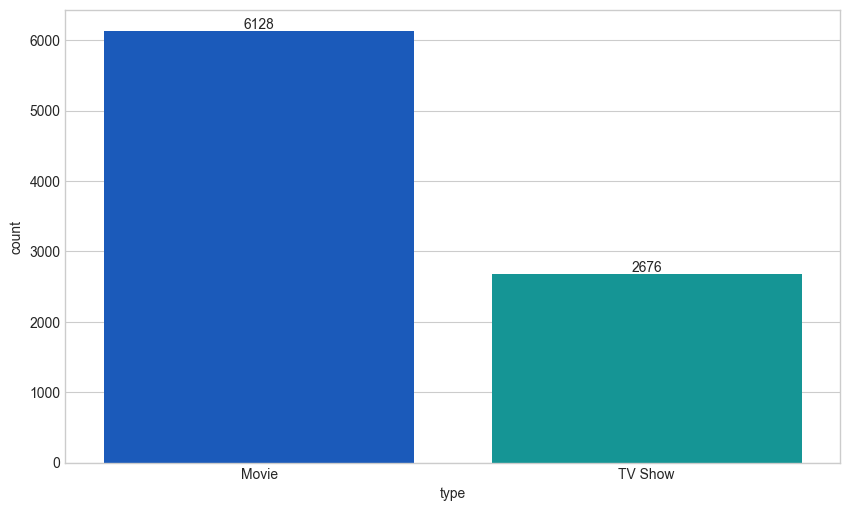

In [85]:
fig,ax = plt.subplots(figsize=(10,6),dpi=100)

sns.countplot(x=df['type'],palette='winter');
for container in ax.containers:
    ax.bar_label(container)

## melihat banyak data berdasarkan rating

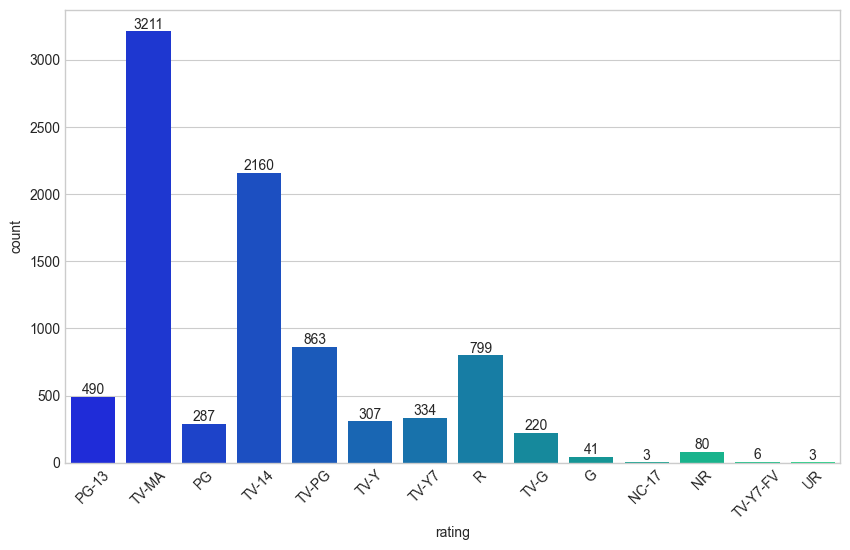

In [86]:
fig,ax = plt.subplots(figsize=(10,6),dpi=100)

sns.countplot(x=df['rating'],palette='winter');
for container in ax.containers:
    ax.bar_label(container)
for label in ax.get_xticklabels():
    label.set(rotation=45)

## melihat banyak data berdasarkan tahun rilis

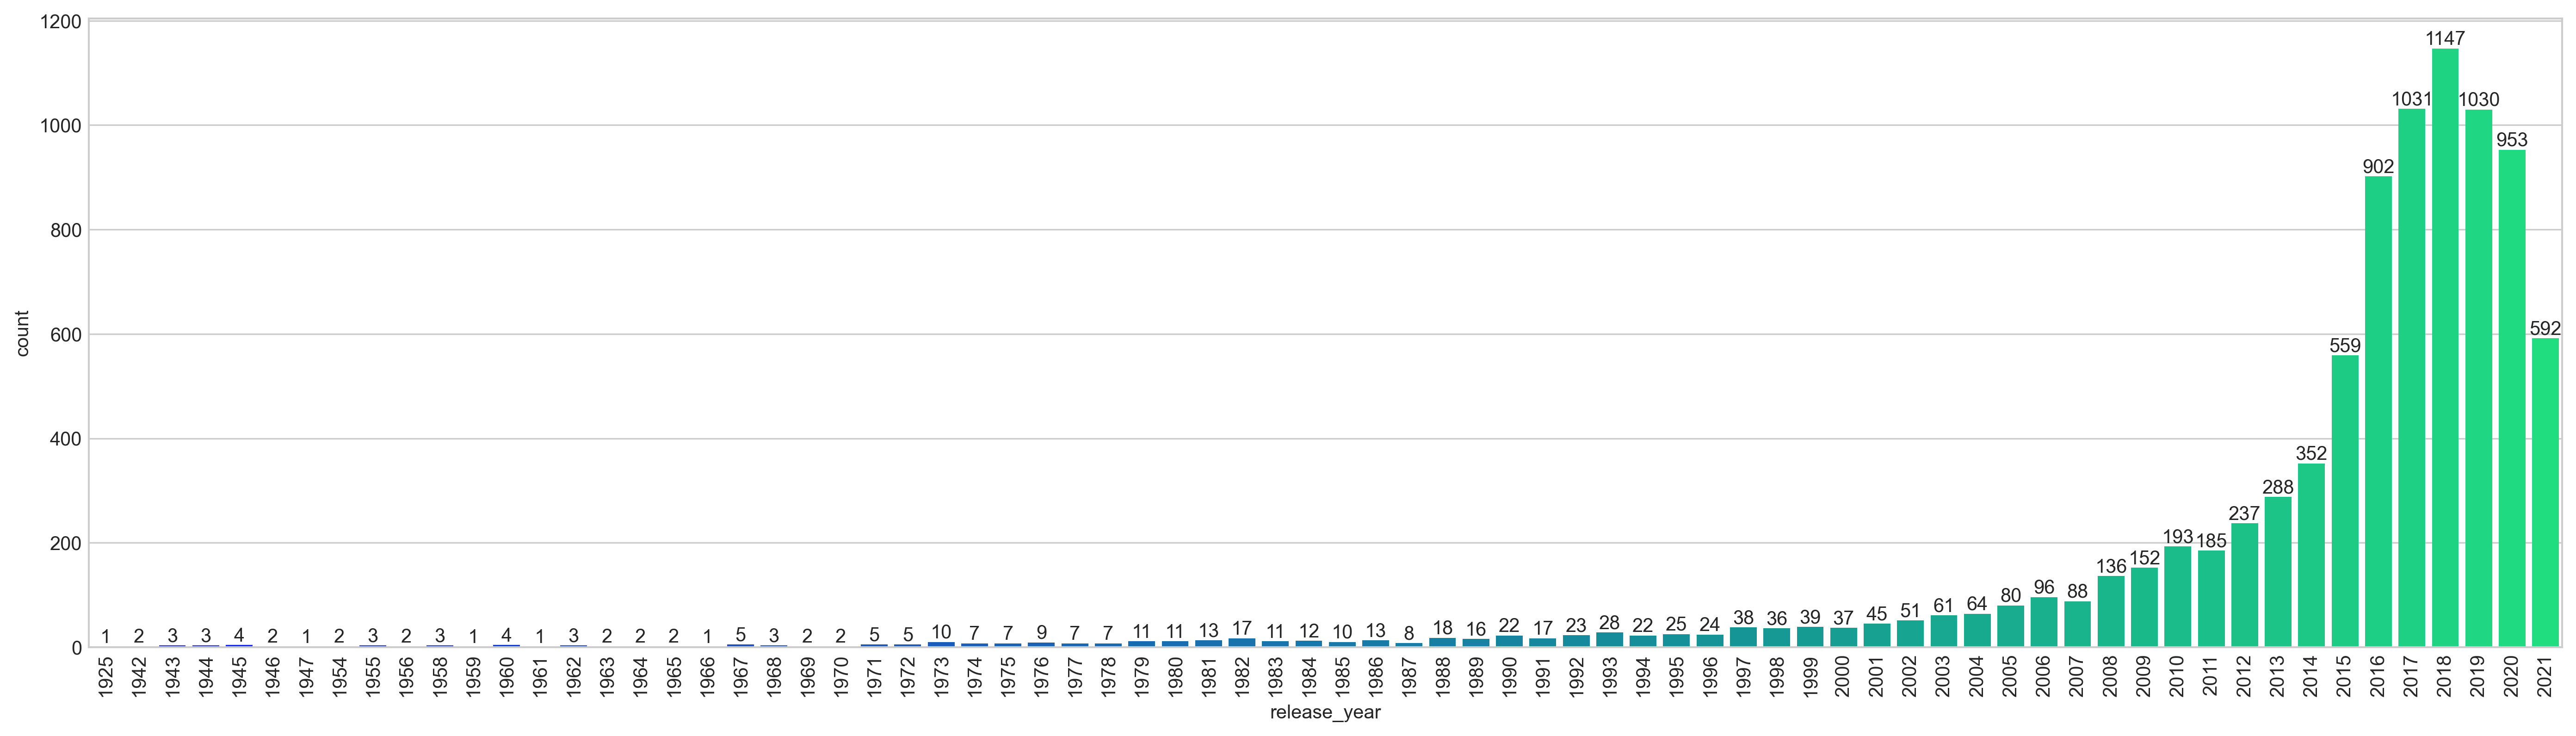

In [87]:
fig,ax = plt.subplots(figsize=(23,6),dpi=300)

sns.countplot(x=df['release_year'],palette='winter');
for container in ax.containers:
    ax.bar_label(container)
for label in ax.get_xticklabels():
    label.set(rotation=90)

## membagi jumlah data rating berdasarkan type

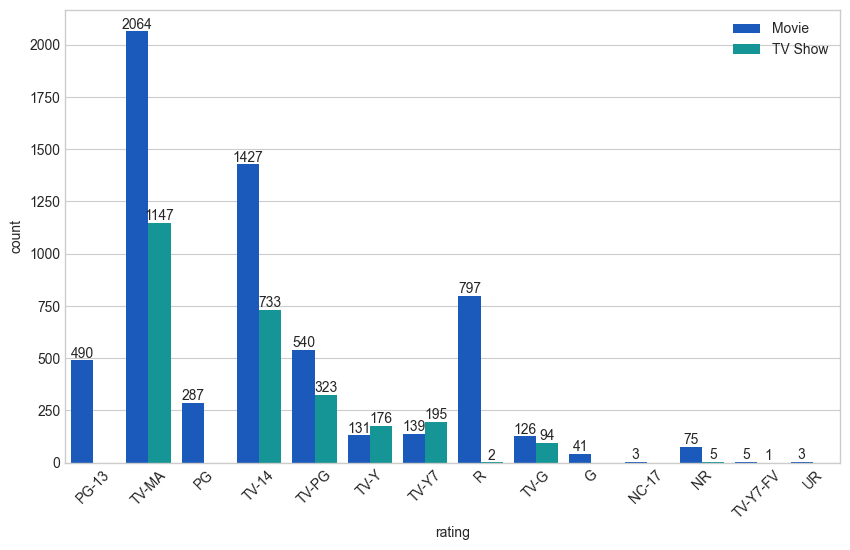

In [88]:
fig,ax = plt.subplots(figsize=(10,6),dpi=100)

sns.countplot(x=df['rating'],hue=df['type'],palette='winter');
for container in ax.containers:
    ax.bar_label(container)
for label in ax.get_xticklabels():
    label.set(rotation=45)
    
ax.legend(loc='upper right');

## melihat 10 movie/shows dengan tahun rilis paling tua

In [89]:
df.nsmallest(10,'release_year')

,show_id,type,title,country,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,United States,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
7790,s7791,Movie,Prelude to War,United States,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,United States,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,United States,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8739,s8740,Movie,Why We Fight: The Battle of Russia,United States,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
8763,s8764,Movie,WWII: Report from the Aleutians,United States,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8419,s8420,Movie,The Memphis Belle: A Story of a\nFlying Fortress,United States,1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...
8436,s8437,Movie,The Negro Soldier,United States,1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...
8640,s8641,Movie,Tunisian Victory,"United States, United Kingdom",1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
1331,s1332,TV Show,Five Came Back: The Reference Films,United States,1945,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...


## melihat 10 movie/shows dengan tahun rilis paling baru

In [90]:
df.nlargest(10,'release_year')

,show_id,type,title,country,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,United States,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
8,s9,TV Show,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,United States,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",United States,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."


## melihat genre yang paling banyak

In [91]:
df[df["type"]=="Movie"]["listed_in"].value_counts()

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
                                                   ... 
Sci-Fi & Fantasy                                      1
Sports Movies                                         1
Children & Family Movies, Comedies, Cult Movies       1
Cult Movies, Dramas, Music & Musicals                 1
Cult Movies, Dramas, Thrillers                        1
Name: listed_in, Length: 278, dtype: int64

## melihat panjang data genre

In [92]:
len(df[df["type"]=="Movie"]["listed_in"].value_counts())

278

## karena data genre terlalu banyak, sehingga diambil 10 genre teratas

In [93]:
top10_genres = df[df["type"]=="Movie"]["listed_in"].value_counts()[:10]
top10_genres

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Comedies, International Movies                      176
Name: listed_in, dtype: int64

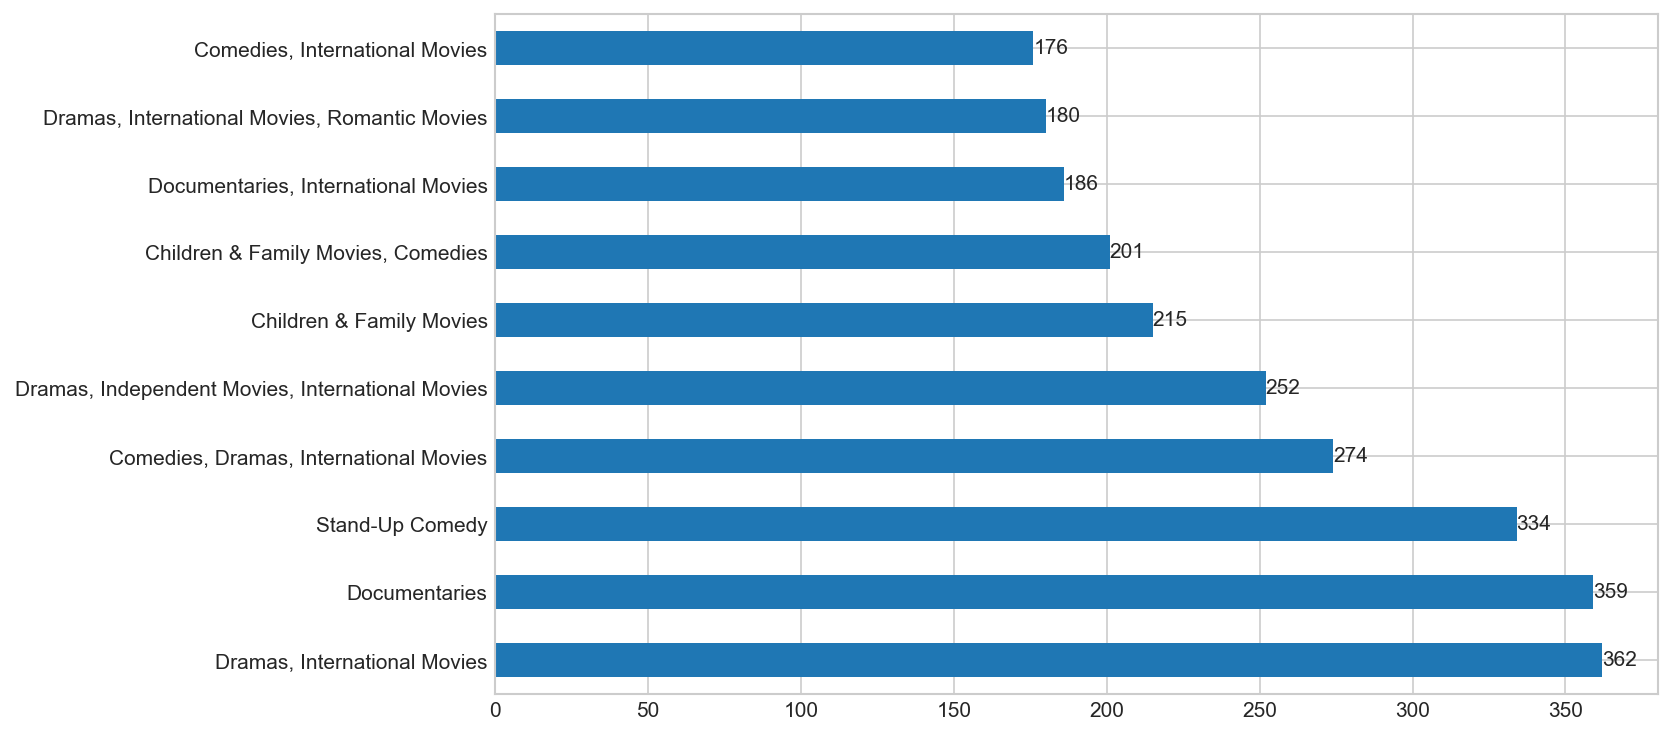

In [94]:
fig,ax = plt.subplots(figsize=(10,6),dpi=150)

top10_genres.plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)

## membagi genre berdasarkan type movie/shows

In [95]:
df['type'].value_counts()

Movie      6128
TV Show    2676
Name: type, dtype: int64

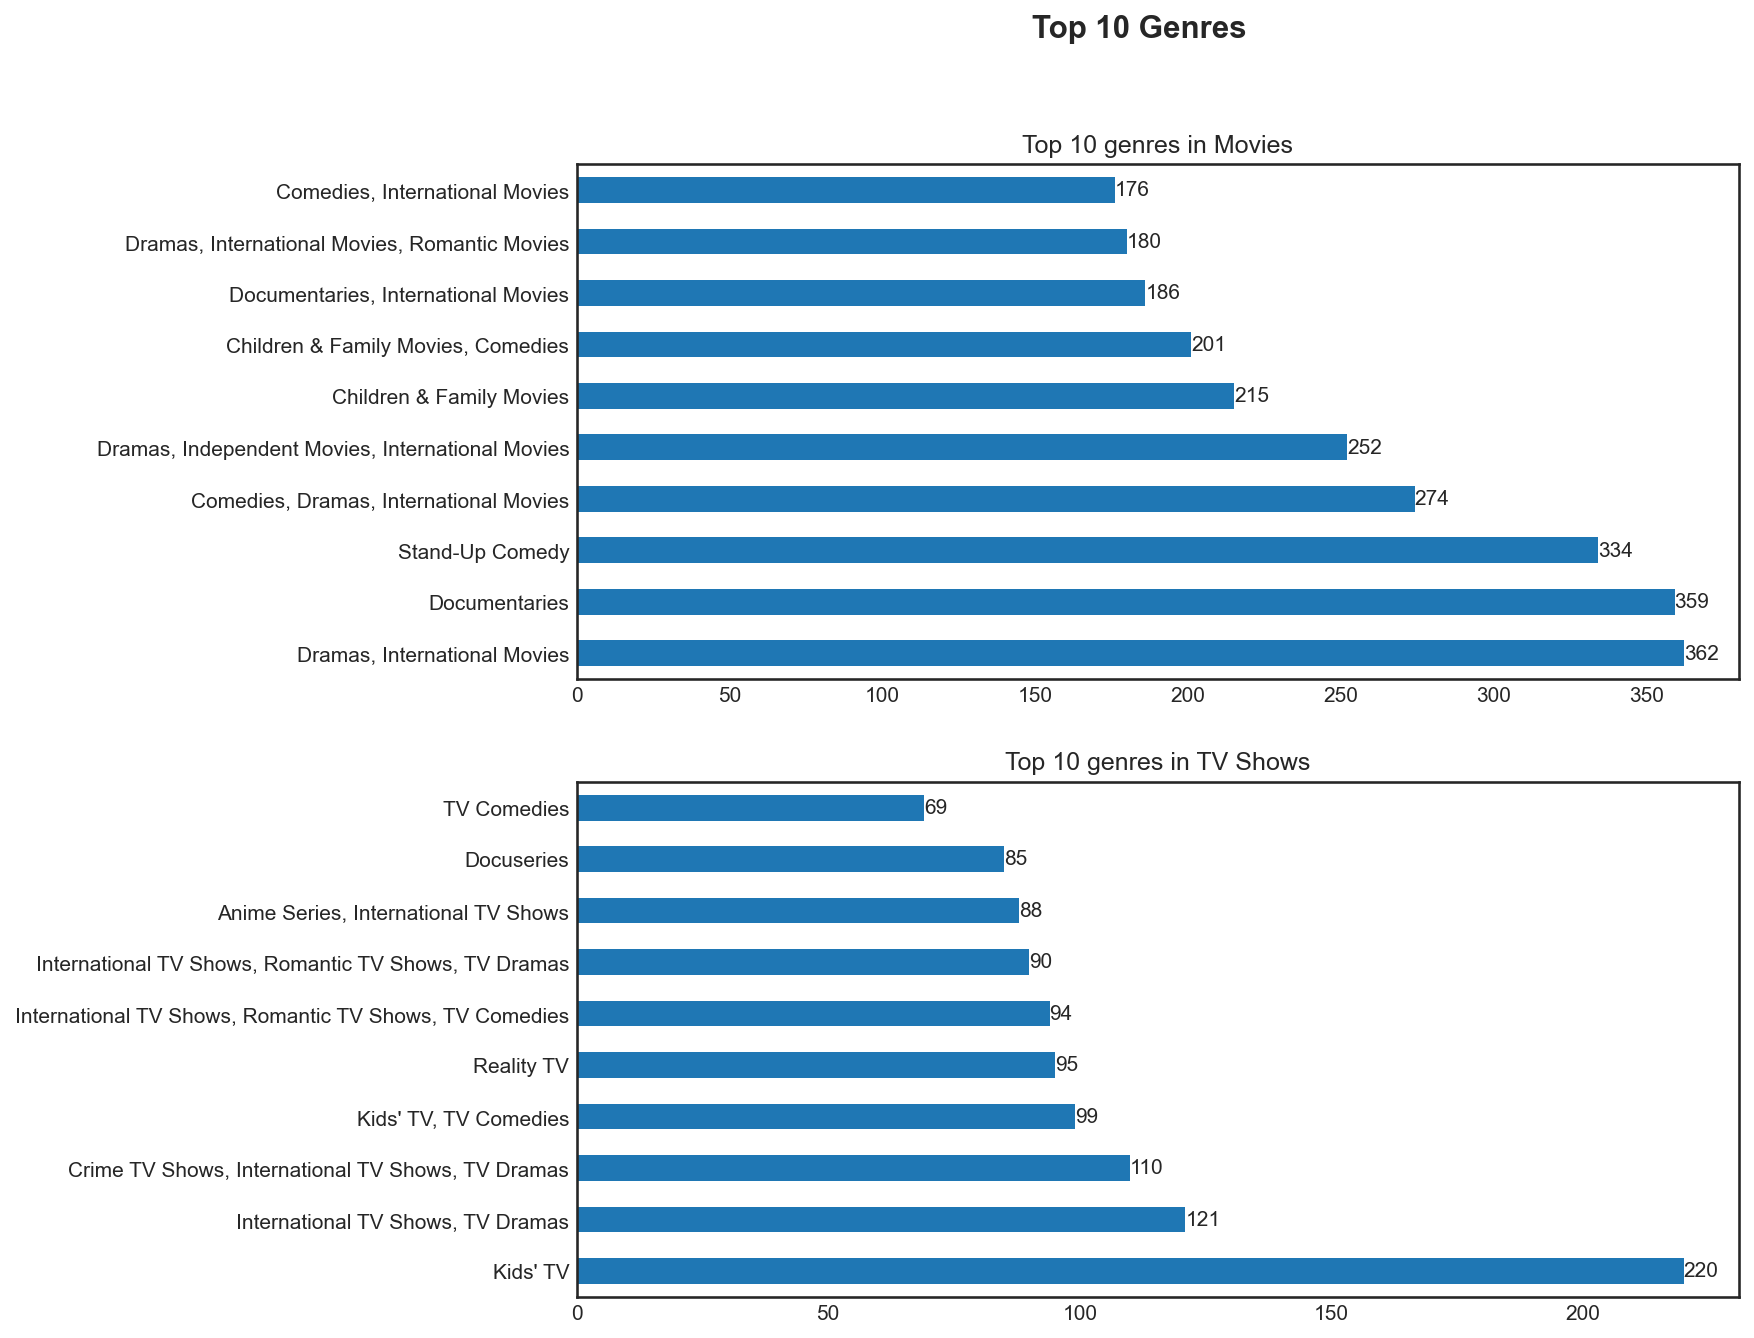

In [103]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10),dpi=150)

# top 10 genre berdasarkan movies
top10_movies_genre=df[df['type']=='Movie']['listed_in'].value_counts()[:10]
movies=top10_movies_genre.plot(ax=ax[0],kind='barh')
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set(title='Top 10 genres in Movies')

# top 10 genre berdasarkan show
top10_shows_genre=df[df['type']=='TV Show']['listed_in'].value_counts()[:10]
shows=top10_shows_genre.plot(ax=ax[1],kind='barh')
for container in ax[1].containers:
    ax[1].bar_label(container)
ax[1].set(title='Top 10 genres in TV Shows')

fig.suptitle('Top 10 Genres',fontsize=15,fontweight='bold');

# melihat rating terbanyak dalam dataframe berdasarkan Movie dan TV Shows

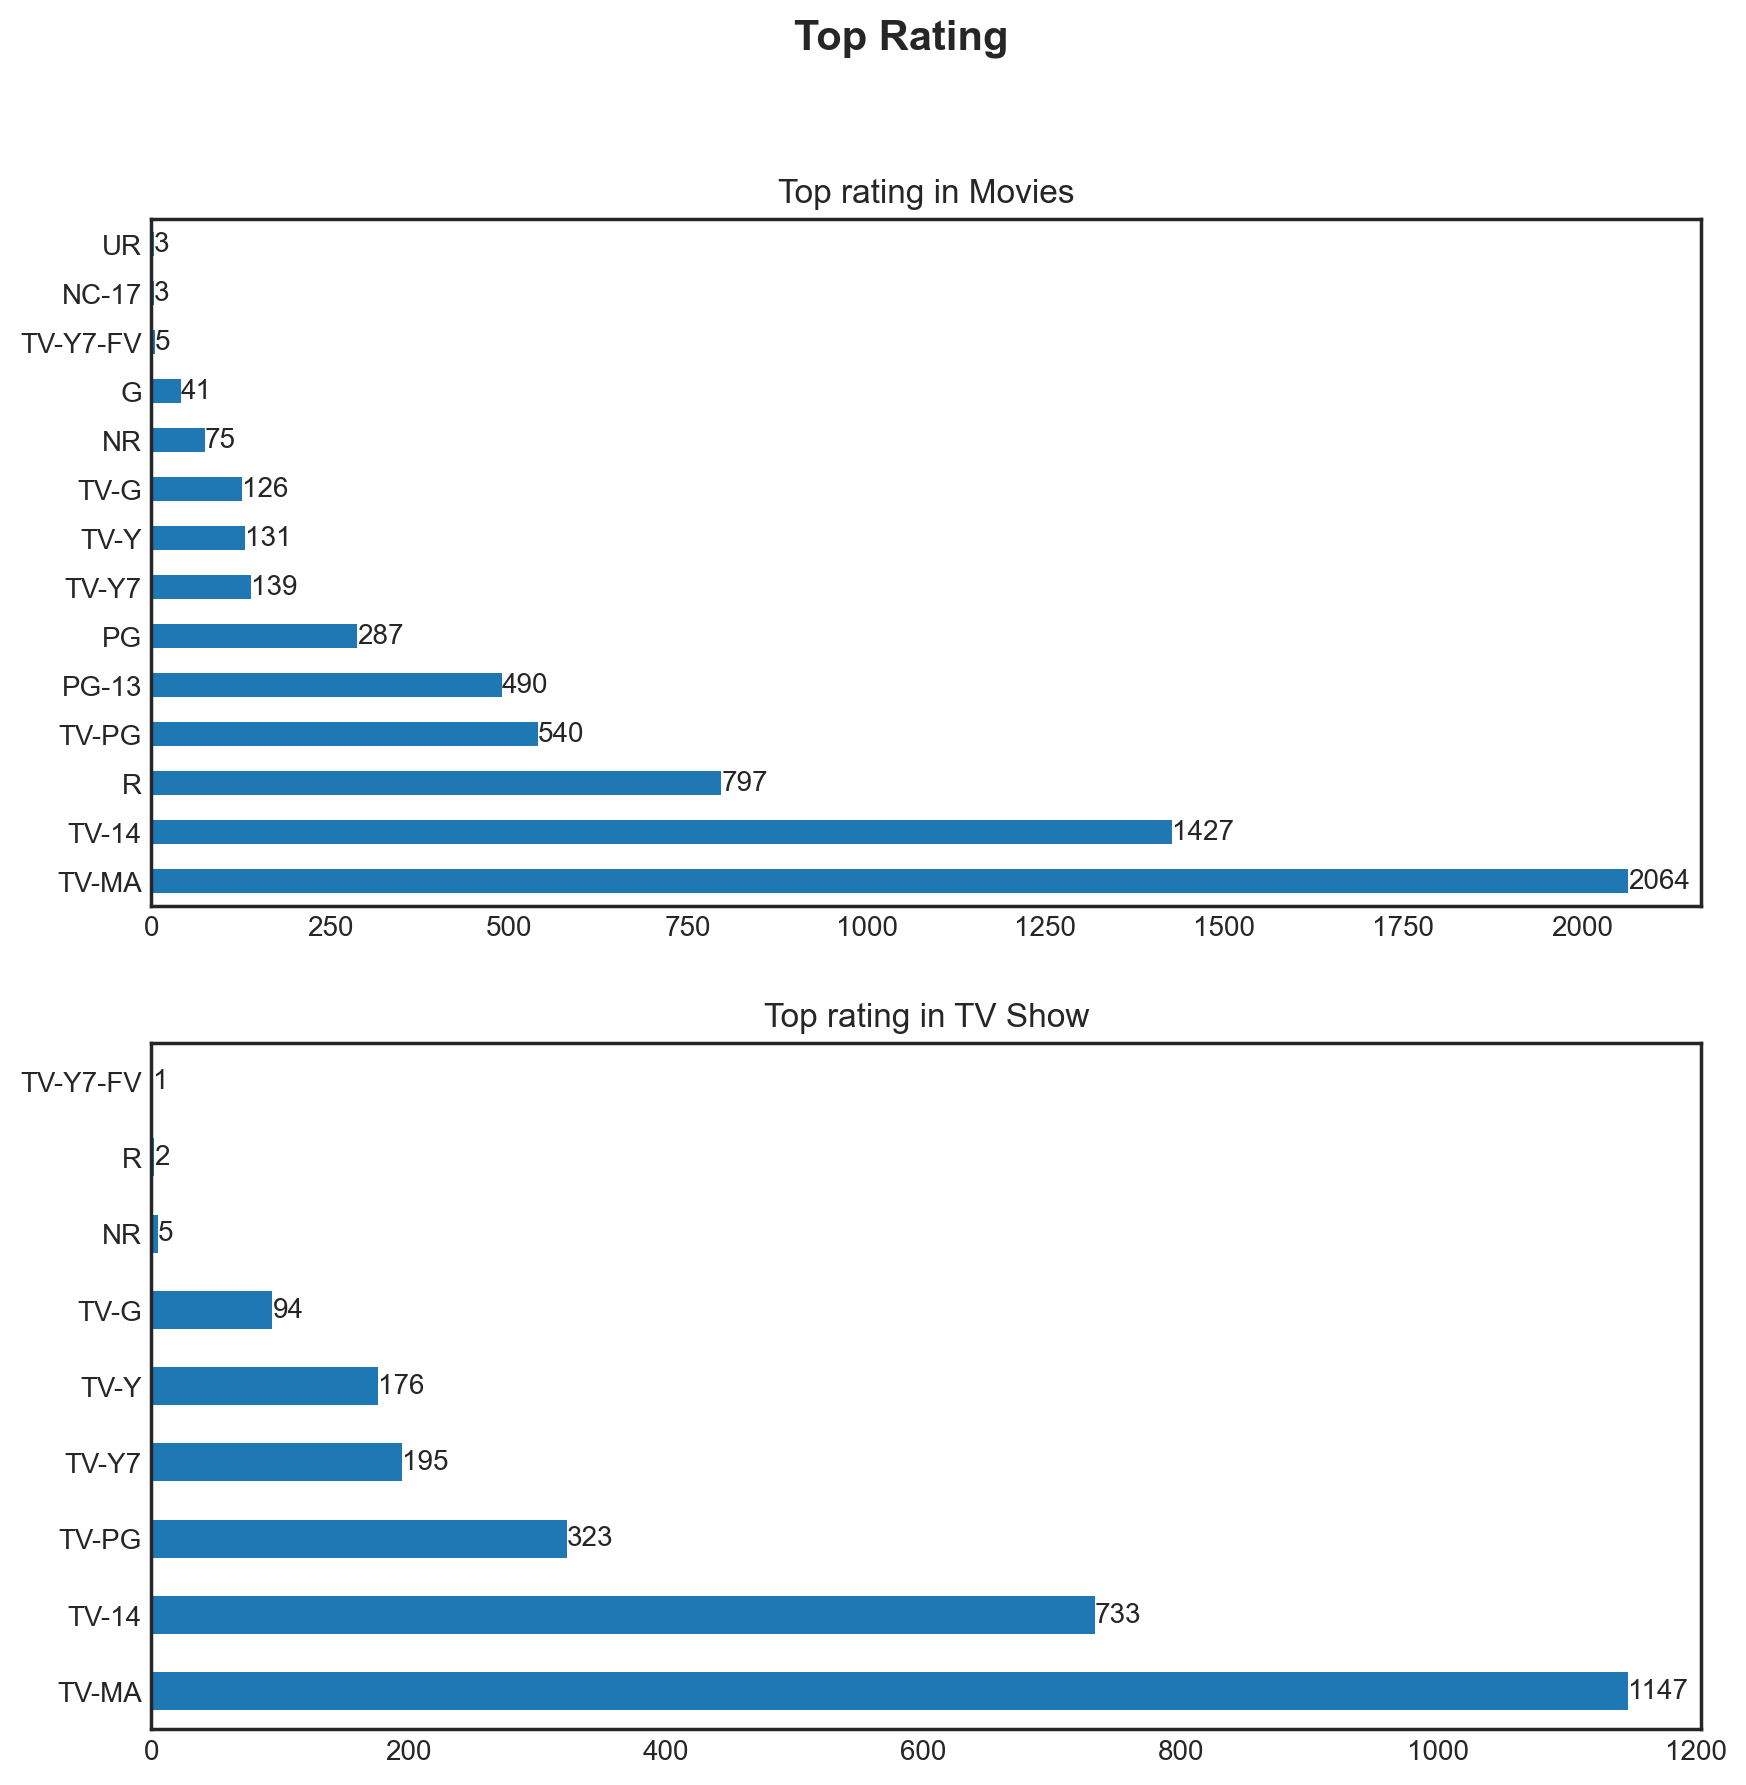

In [97]:
plt.style.use('seaborn-white')
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1,figsize=(10,10),dpi=200)

# rating terbanyak berdasarkan movies
top_movies_rating = df[df['type']=='Movie']['rating'].value_counts()
movies=top_movies_rating.plot(ax=ax1,kind='barh')
for container in ax1.containers:
    ax1.bar_label(container)
ax1.set(title='Top rating in Movies')

# rating terbanyak berdasarkan TV shows
top_show_rating = df[df['type']=='TV Show']['rating'].value_counts()
show=top_show_rating.plot(kind='barh',ax=ax2)
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set(title='Top rating in TV Show')

fig.suptitle('Top Rating',fontweight='bold',fontsize=15);

plt.savefig('netflix analyst.png')